In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
#данные
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


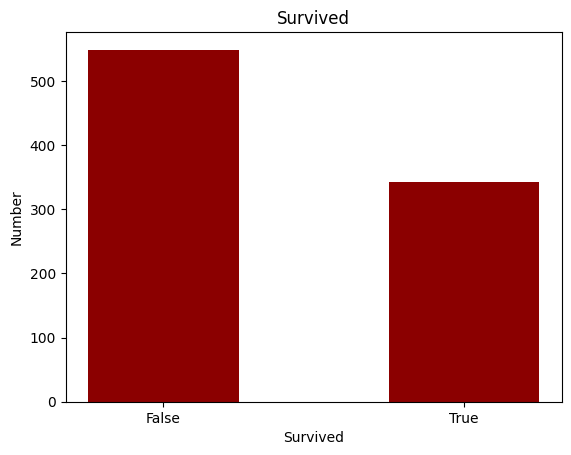

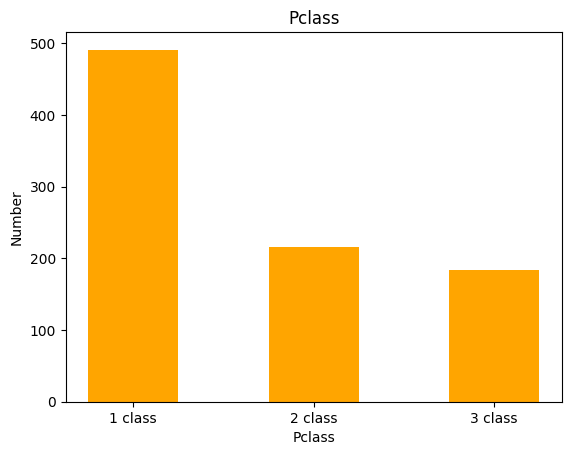

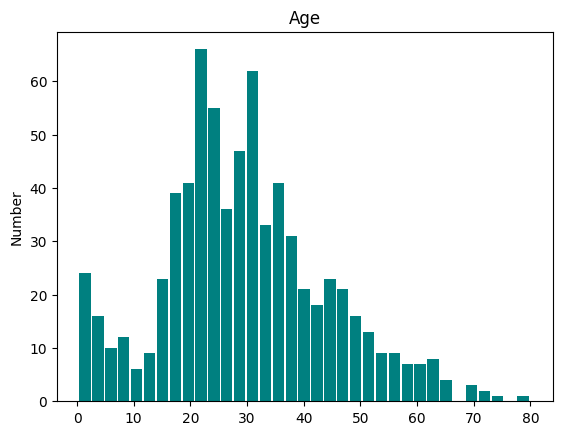

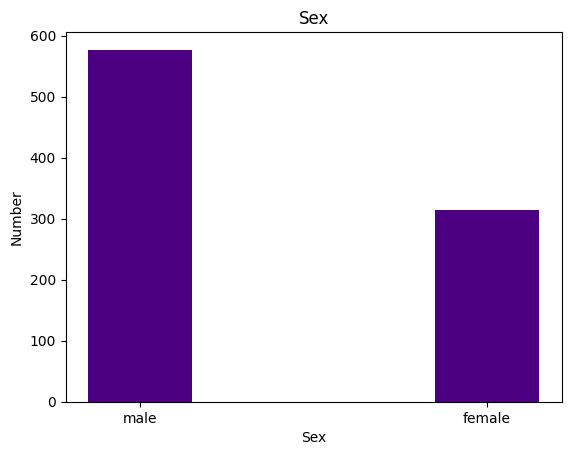

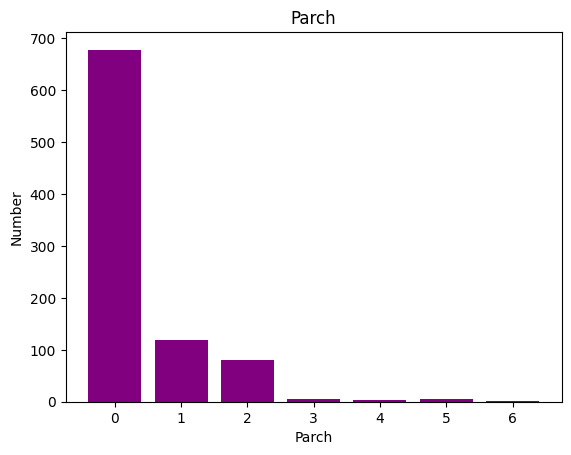

In [6]:
#графики распределения
x = ['False', 'True']
y = df['Survived'].value_counts()
fig, ax = plt.subplots()
ax.set_xlabel('Survived')
ax.set_ylabel('Number')
ax.set_title('Survived')
ax.bar(x=x, height=y, width=0.5, color='darkred');
plt.show()

x = ['1 class','2 class', '3 class']
y = df['Pclass'].value_counts()
fig, ax = plt.subplots()
ax.set_xlabel('Pclass')
ax.set_ylabel('Number')
ax.set_title('Pclass')
ax.bar(x=x, height=y, width=0.5, color='orange');
plt.show()

df['Age'].plot(kind='hist', bins=35, width=2, title='Age', ylabel='Number', color='teal')
plt.show()

x = ['male','female']
y = df['Sex'].value_counts()
fig, ax = plt.subplots()
ax.set_xlabel('Sex')
ax.set_ylabel('Number')
ax.set_title('Sex')
ax.bar(x=x, height=y, width=0.3, color='indigo');
plt.show()

x = df['Parch'].unique()
y = df['Parch'].value_counts()
fig, ax = plt.subplots()
ax.set_xlabel('Parch')
ax.set_ylabel('Number')
ax.set_title('Parch')
ax.bar(x=x, height=y, color='purple');
plt.show()

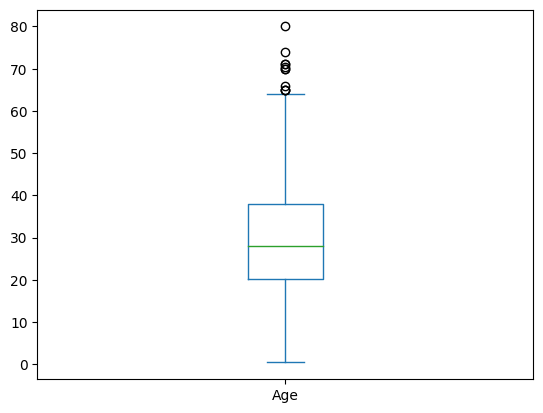

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64 

 mean - зеленая линия на графике 
 75% и 25% - верх и низ бокса 
 нижняя черта - 0,42 
 верхняя черта - 64.8125 
 все что выше верхней черты - выбросы


In [45]:
#boxplot Age с интерпретацией
df['Age'].plot(kind='box')
plt.show()

print(df['Age'].describe(),'\n\n mean - зеленая линия на графике \n 75% и 25% - верх и низ бокса \n нижняя черта - 0,42 \n верхняя черта -', 38+1.5*17.875, '\n все что выше верхней черты - выбросы')

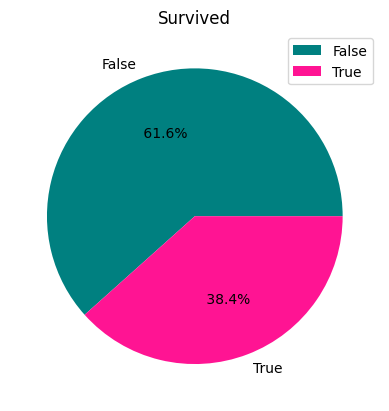

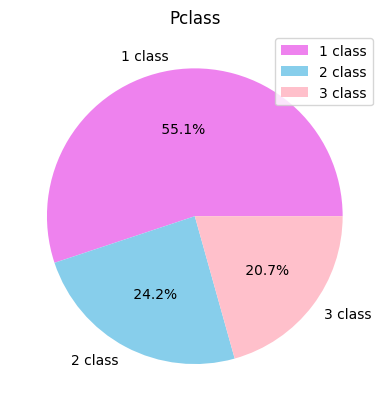

In [46]:
#pie chart для Survived и Pclass
colors = ['teal','indigo','purple']
labels = ['False','True']
value = df['Survived'].value_counts()
fig, ax = plt.subplots()
ax.pie(value, labels=labels, autopct= ' %1.1f%%', colors=['teal','deeppink']);
ax.set_title('Survived')
plt.legend()
plt.show()

labels = ['1 class','2 class','3 class']
value = df['Pclass'].value_counts()
fig, ax = plt.subplots()
ax.pie(value, labels=labels, autopct= ' %1.1f%%', colors=['violet','skyblue','pink']);
ax.set_title('Pclass')
plt.legend()
plt.show()

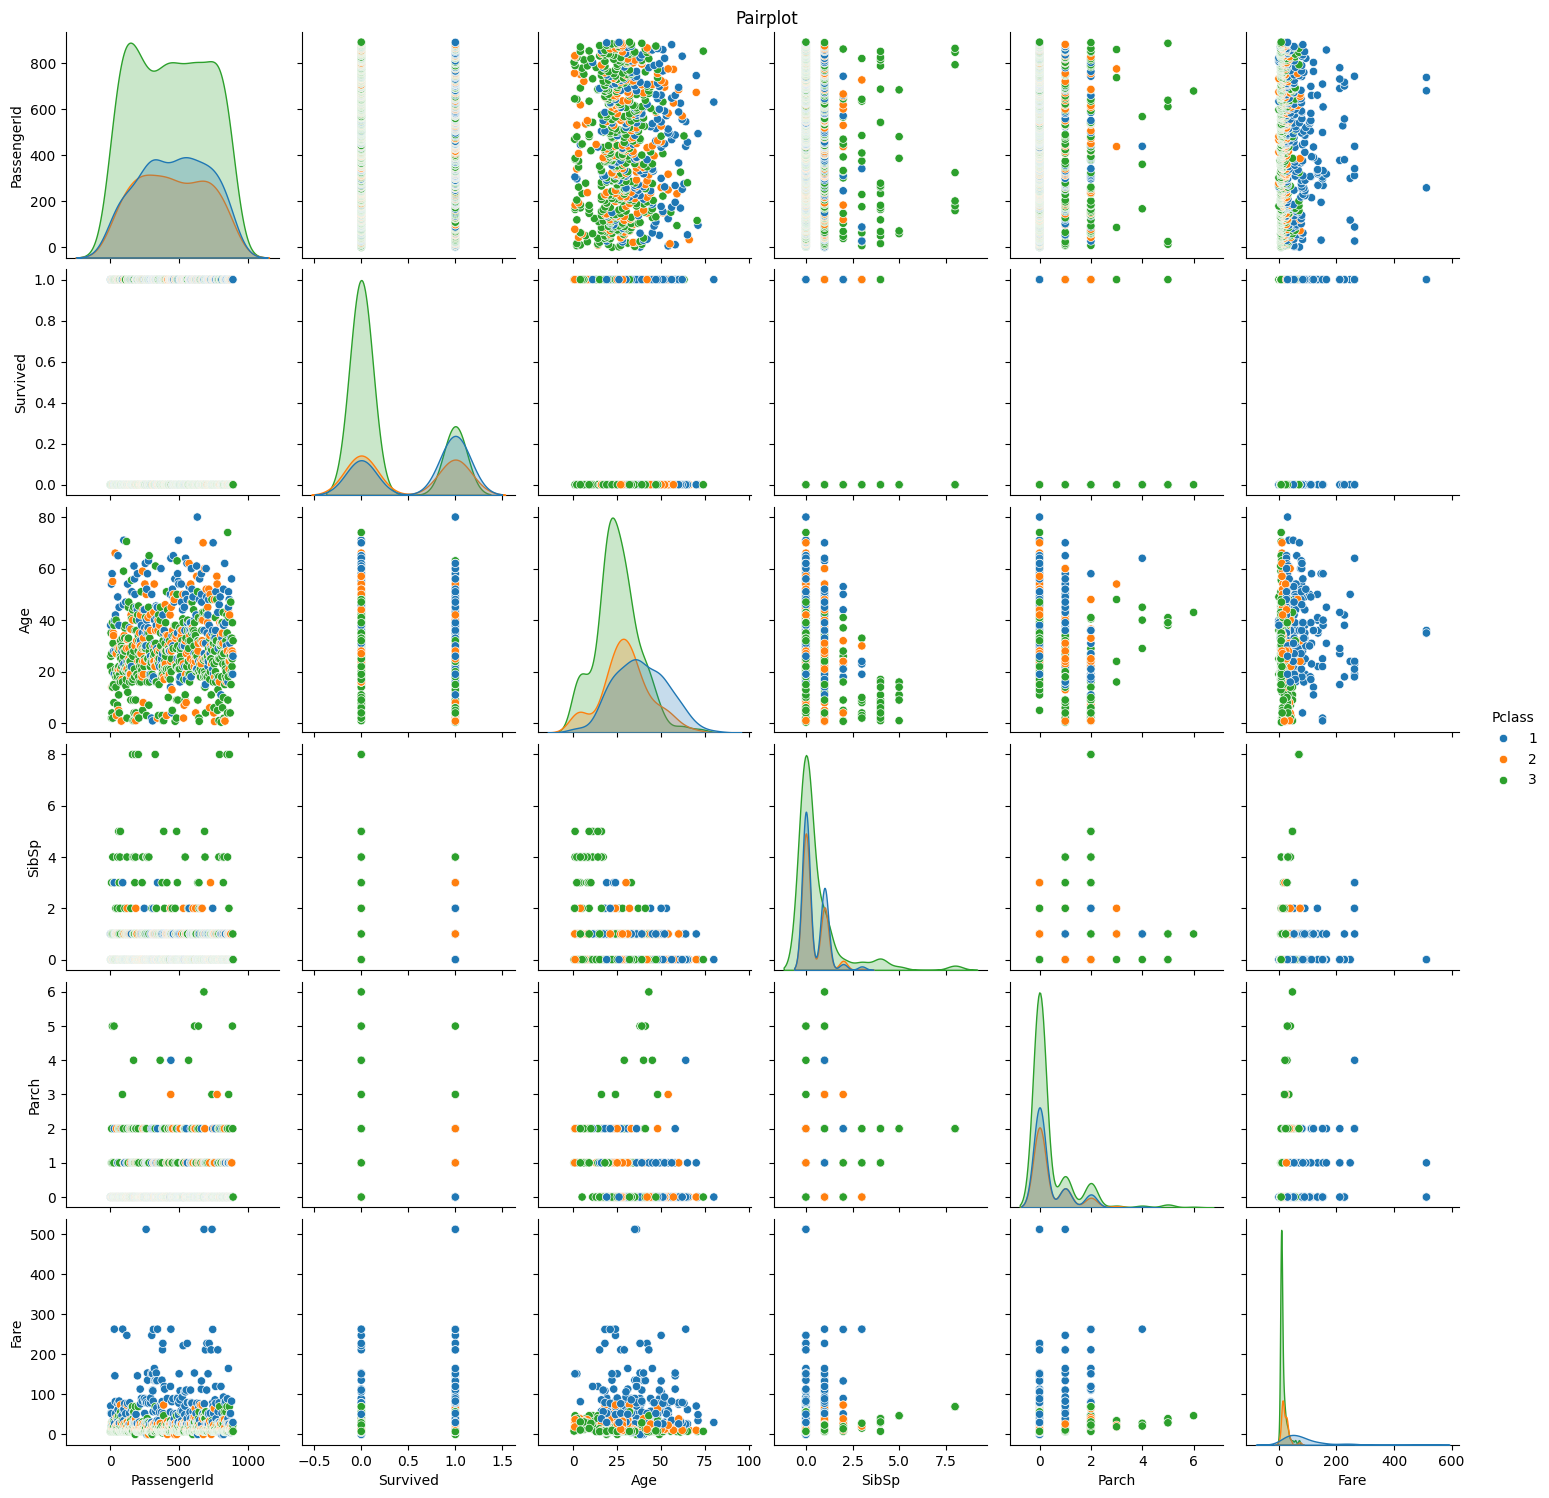

In [50]:
#pairplot для всех числовых переменных
nf=df.select_dtypes(include=['float64', 'int64'])
sns.pairplot(nf, hue='Pclass',palette='tab10').fig.suptitle('Pairplot', y=1)
plt.show()

In [70]:
#sunburst plot к-во пассажиров в каждом из классов/к-во мужчин и женщин в каждом классе
px.sunburst(df, path=['Pclass', 'Sex'])
fig.update_layout(title_text='Pclass hierarchy')
fig.show()

